
# Linear Regression on Boston Housing Dataset

Description of the headers:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [5]:
housing = pd.read_csv('BostonHousingData.csv')

In [7]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

Let's check the data and try to clean it:

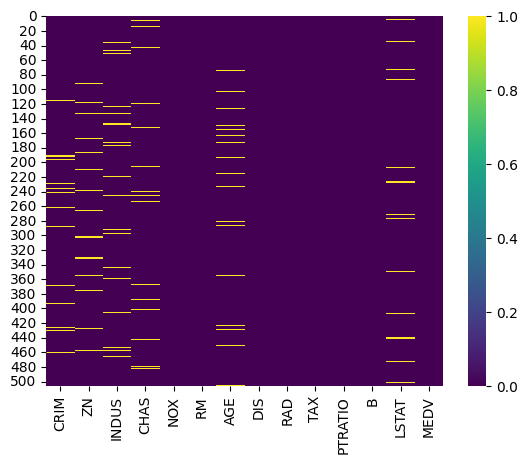

In [14]:
sns.heatmap(housing.isnull(), cmap='viridis')
plt.show()

In [16]:
housing.dropna(inplace=True)

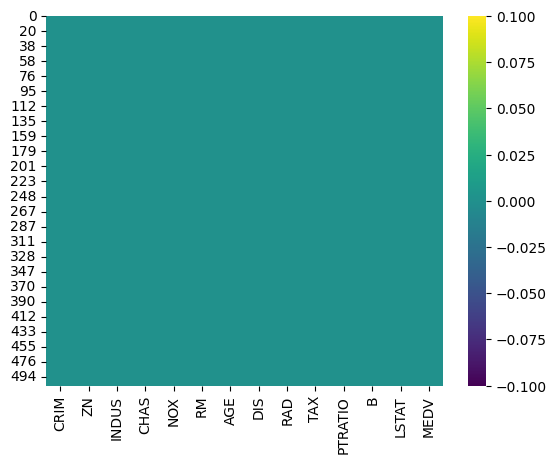

In [18]:
sns.heatmap(housing.isnull(), cmap='viridis')
plt.show()

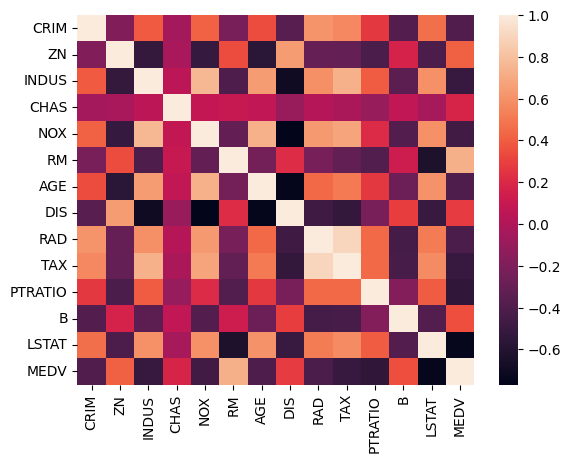

In [20]:
sns.heatmap(housing.corr())
plt.show()

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the MEDV column. 

### X and y arrays

In [23]:
X=housing.drop(columns=['MEDV'],axis=1)
y=housing.MEDV

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [38]:
# print the intercept
print(lm.intercept_)

29.69789550241731


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.070109
ZN,0.043046
INDUS,-0.010958
CHAS,2.562103
NOX,-17.634617
RM,4.475084
AGE,-0.015331
DIS,-1.209293
RAD,0.276147
TAX,-0.014777


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [43]:
predictions = lm.predict(X_test)

In [45]:
plt.scatter(y_test,predictions)

In [47]:
predictions

array([22.72673404, 15.09428973, 42.56865873, 35.33695135, 37.73201288,
       23.20116273, 24.19317474, 28.27426454, 20.53042878, 26.11761759,
       21.77435669, 32.75535509, 17.96477883,  3.49051979, 17.82452794,
       24.60239594, 22.58613886, 23.27251232, 22.05377099, 28.54850092,
       19.81181315, 39.75205945, 23.97903248, 27.50189217, 35.47627368,
       13.21479001, 16.29182029, 22.0148504 , 20.91217189, 35.62005233,
       18.48715694, -2.28660714, 11.27737632, 32.51476942, 17.68847536,
       33.1884664 , 21.89605173, 26.29769919, 28.45767491, 36.42760852,
       19.13053996, 28.9780273 , 28.92179621, 25.75165071, 20.44869068,
       18.32132938, 18.00744337, 25.17097521, 25.01047848, 21.24712055,
       27.77481723, 25.56295953, 11.33903313, 11.17735396, 12.83437233,
       22.82392055, 18.30277687, 19.36481488, 16.6931374 , 13.25152908,
       20.08199647, 27.92596172, 14.90313605, 18.45019653, 22.11635399,
       33.11416593, 23.21895701, 22.70784209, 17.05598367, 18.30

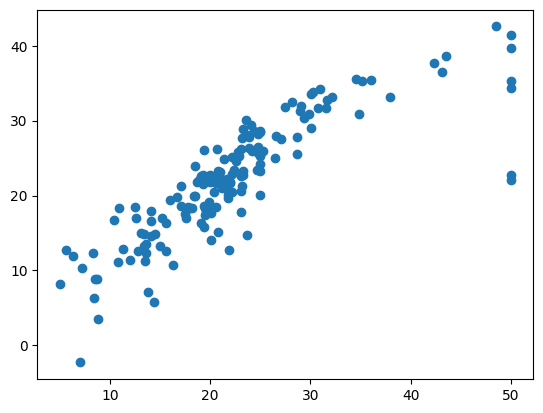

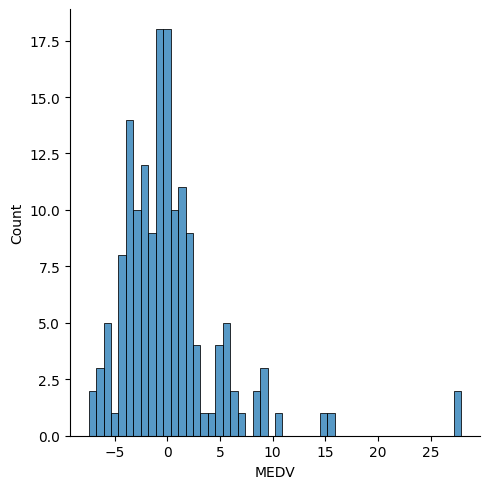

In [50]:
sns.displot((y_test-predictions),bins=50)
plt.show()

In [52]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.1944926775831717
MSE: 24.715486087904868
RMSE: 4.971467196704094
